<center>Universidade Federal de Viçosa</center>
<center>Pós Graduação em Inteligência Artificial e Computacional</center>
<center>ELT578 - Análise de Imagens e Visão Computacional</center>
<center>TURMA 2022/2</center>

**<center>AULA PRÁTICA 3: Técnicas de Filtragem, Transformações Geométricas e Métricas de Qualidade de Imagem </center>**

<center>Aluno: Michel Batistin Fiorio</center>


### Filtragem
A aplicação de um filtro em uma imagem é outra técnica de processamento muito utilizada para obter ou melhorar determinada informação desejada.
A filtragem pode ser realizada no domínio espacial ou domínio da frequência.
Um dos filtros no domínio espacial é o processamento por máscara. Se trata da modificação do valor do pixel com base nos valores dos seus vizinhos e de uma máscara pré-selecionada (correlação cruzada). É uma aplicação de alto custo computacional pois utiliza-se uma máscara para cada pixel da imagem.
Já a convolução é uma técnica de filtragem no domínio da frequÊncia. Ela demanda menos poder computacional.
Tipos de filtros são de suavização e agudização. 
Nessa atividade realizaremos alguns tipos de filtragem em imagens.


In [28]:
#Permissão para acessar o drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
#Importando bibliotecas
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

#### Filtragem por máscara. Correlação cruzada
Filtragem no domínio espacial.

In [30]:
# Correlação cruzada.

# Montando uma imagem na escala de cinza
I = np.array([[1,1,5,0,3],[4,3,0,1,4],[0,1,4,1,5],[0,1,3,0,4],[0,5,0,1,1]],dtype='uint8')

# Criando a máscara do filtro
F = np.array([[1,1,1],[2,3,1],[1,0,2]],dtype='uint8')

print(I,'\n', '\n', F)

[[1 1 5 0 3]
 [4 3 0 1 4]
 [0 1 4 1 5]
 [0 1 3 0 4]
 [0 5 0 1 1]] 
 
 [[1 1 1]
 [2 3 1]
 [1 0 2]]


In [31]:
# Realizando a filtragem de I com a máscara F

# Método de extrapolação das bordas padrão
I_f1 = cv2.filter2D(I, -1, F, borderType=cv2.BORDER_REFLECT101)
# Método de extrapolação das bordas constante
I_f2 = cv2.filter2D(I, -1, F, borderType=cv2.BORDER_CONSTANT)
# Método de extrapolação com bordas isoladas
I_f3 = cv2.filter2D(I, -1, F, borderType=cv2.BORDER_ISOLATED)

Text(0.5, 1.0, 'Filtro com borda isolada')

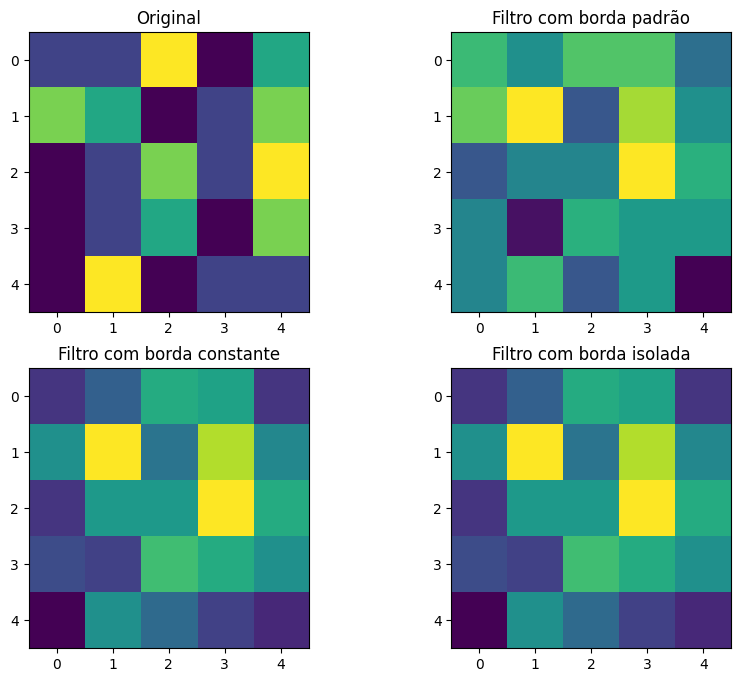

In [32]:
# Mostrando imagem original x imagens filtradas
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.imshow(I)
plt.title('Original')
plt.subplot(2,2,2)
plt.imshow(I_f1)
plt.title('Filtro com borda padrão')
plt.subplot(2,2,3)
plt.imshow(I_f2)
plt.title('Filtro com borda constante')
plt.subplot(2,2,4)
plt.imshow(I_f3)
plt.title('Filtro com borda isolada')

#### Filtro por suavização.
Filtragem no domínio espacial. Borramento, remoção de ruídos.

In [33]:
# Criando função para adicionar ruído Salt&Pepper em uma imagem
def add_chuvisco(original,controle):
  # controle: número entre 0 e 0.5 que controla a quantidade de ruído
  #           Quanto maior, mais ruído
  # Criando matriz de ruídos aleatórios (0-1) com a mesma dimensão da imagem de entrada
  ruido = np.random.rand(original.shape[0], original.shape[1])
  # Definindo ruidosa como cópia da imagem de entrada
  ruidosa = original.copy()
  # Acrescentando ruído
  ruidosa[ruido<controle]=0
  ruidosa[ruido>1-controle]=255
  return ruidosa

# Criando função para adicionar ruído gaussiano em uma imagem
def add_gauss(original,media,dp):
  # media e desvio padrão(dp) do ruído a ser gerado
  # Criando matriz de zeros com mesma dimensão da imagem original
  ruido = np.zeros(original.shape, np.uint8)
  # Criando ruído aleatório entre 0 e 1 com distribuição normal randômica
  cv2.randn(ruido,media,dp)
  # Acrescentando ruído a imagem de entrada
  ruidosa = np.add(original,ruido)
  return ruidosa


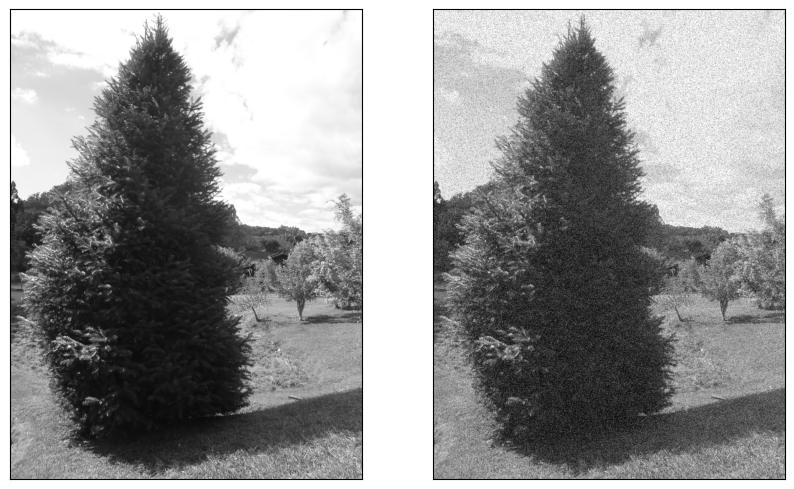

In [45]:
# Borramento

# Carregando duas imagens em tom de cinza
arvore = cv2.imread('/content/drive/MyDrive/DSC00790.JPG',0)
gaivota = cv2.imread('/content/drive/MyDrive/gaivota.jpg',0)

# Adicionando ruído Salt&Pepper na imagem da arvore
arvore_ruido = add_chuvisco(arvore,0.1)
# Adicionando ruído gaussiano na imagem da gaivota
gaivota_ruido = add_gauss(gaivota,0,50)

# Mostrando imagem arvore original x ruidosa
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(arvore, cv2.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(arvore_ruido, cv2.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])
plt.show()

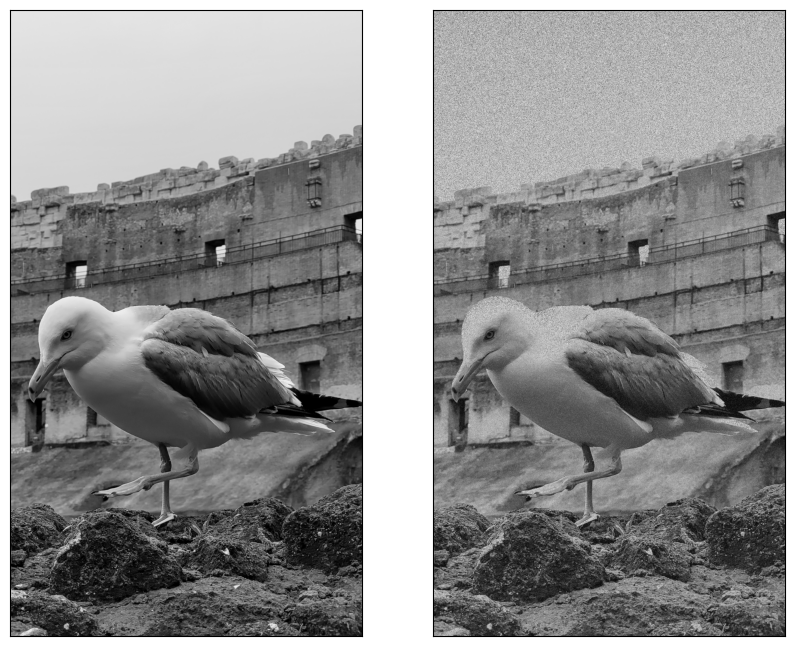

In [35]:
# Mostrando imagem gaivota original x ruidosa
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(gaivota, cv2.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(gaivota_ruido, cv2.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])
plt.show()

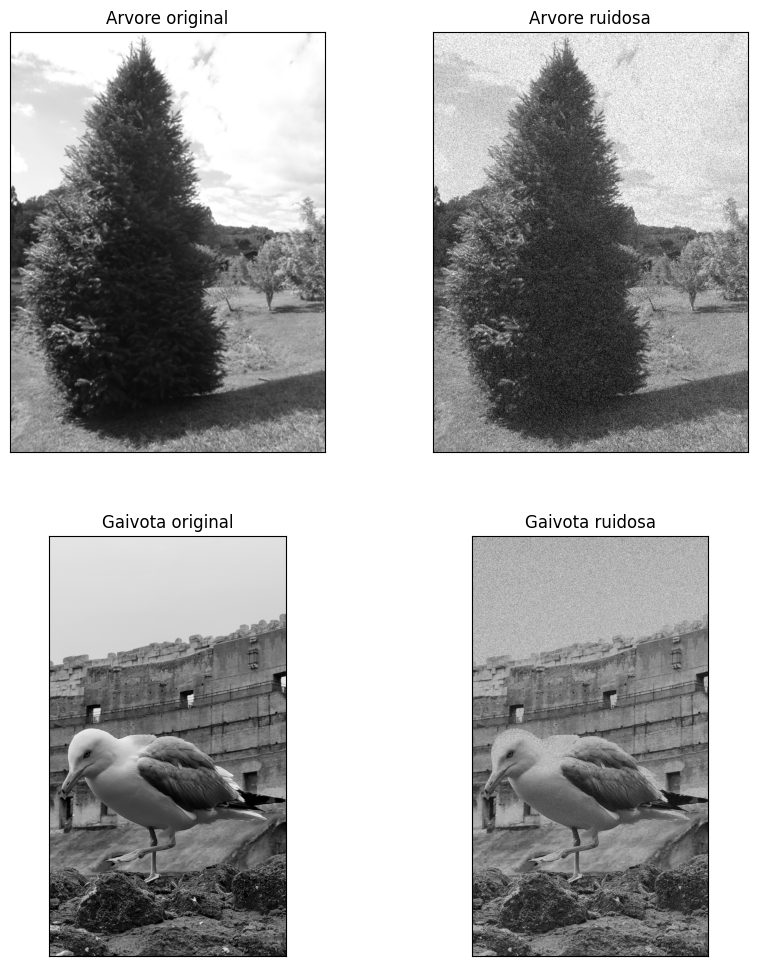

In [36]:
# Aplicação do filtro de suavização nas imagens originais e com ruído
# Originais
arvore_S = cv2.blur(arvore,[7,7])
gaivota_S = cv2.blur(gaivota,[3,3])
# Com ruído
arvore_ruido_S = cv2.blur(arvore_ruido,[3,3])
gaivota_ruido_S = cv2.blur(gaivota_ruido,[3,3])

# Mostrando imagens originais e ruidosas após aplicação do borramento
titulos = ['Arvore original', 'Arvore ruidosa', 'Gaivota original','Gaivota ruidosa']
imagens = [arvore_S, arvore_ruido_S, gaivota_S, gaivota_ruido_S]

plt.figure(figsize=(10,12))
for i in list(range(4)):
    plt.subplot (2,2,i+1), plt.imshow(cv2.cvtColor(imagens[i], cv2.COLOR_BGR2RGB))
    plt.title(titulos[i])
    plt.xticks([]), plt.yticks([])
plt.show()


#### Filtro Sobel
Filtro no domínio da frequência. Filtro passa alta, com função de realçar bordas e ruídos. É um filtro derivativo.


uint8
0
255


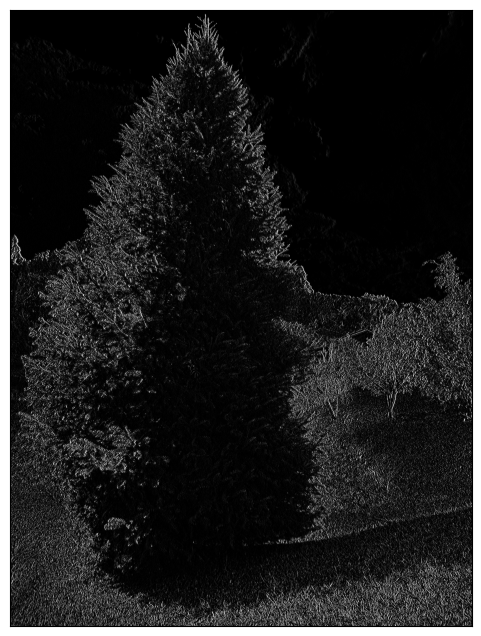

In [37]:
# Aplicando SOBEL na imagem da arvore
arvore_sobel = cv2.Sobel(arvore,-1,1,0)
print(arvore_sobel.dtype)
print(arvore_sobel.min())
print(arvore_sobel.max())
# Mostrando imagem filtrada
plt.figure(figsize=(14,8))
plt.imshow(cv2.cvtColor(arvore_sobel,cv2.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])
plt.show()

### Transformações Geométricas
É o processo de deformação da geometria da imagem para remoção de distorções óticas introduzidas pela câmera. 
Existem as transformadas lineares, como translação, projeção, affine, similaridade, e as transformadas não-lineares, como fluxo ótico e deformação não-linear.
Nessa atividade iremos realizar transformações lineares de perspectiva.


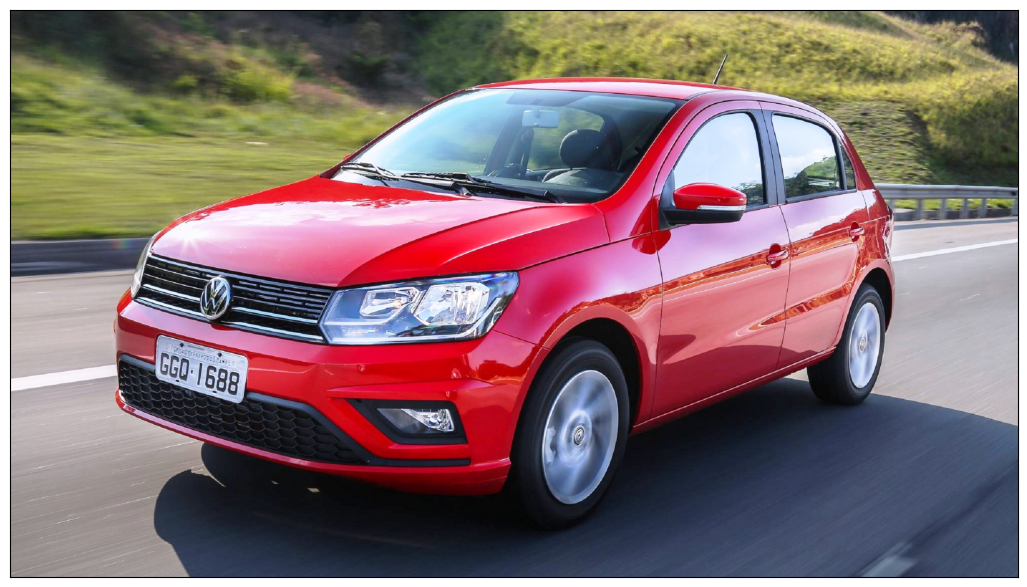

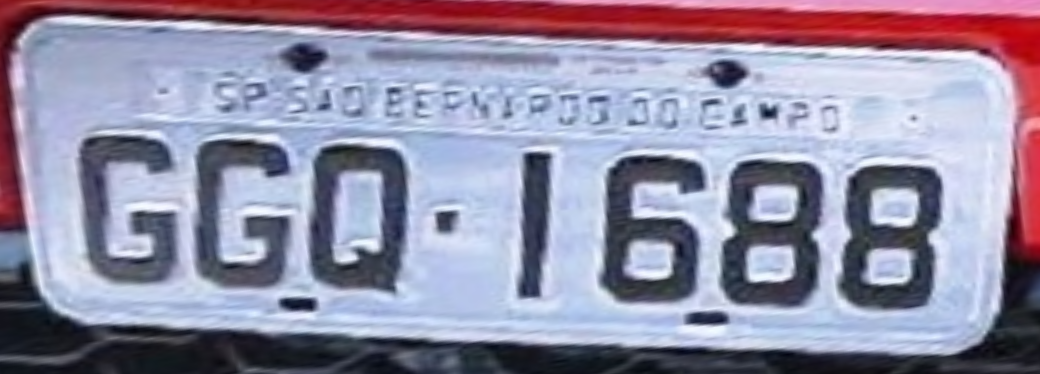

In [38]:
#Imagem lateral 1

# Carregando imagem
img1 = cv2.imread('/content/drive/MyDrive/placa 1.jpeg')

# Definindo os pontos da imagem para transformação
pt1=np.float32([[358, 779], [566, 830], [549, 934], [348, 877]])
pt2=np.float32([[48, 28],[1011, 60],[977, 341],[52, 317]])

# Retirando o quadro e transformando a perspectiva
M=cv2.getPerspectiveTransform(pt1,pt2)
IT1=cv2.warpPerspective(img1,M,(1040,374))

# Mostrando imagem original e o quadro transformado de perspectiva
plt.figure(figsize=(13,8))
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])
plt.show()
cv2_imshow(IT1)

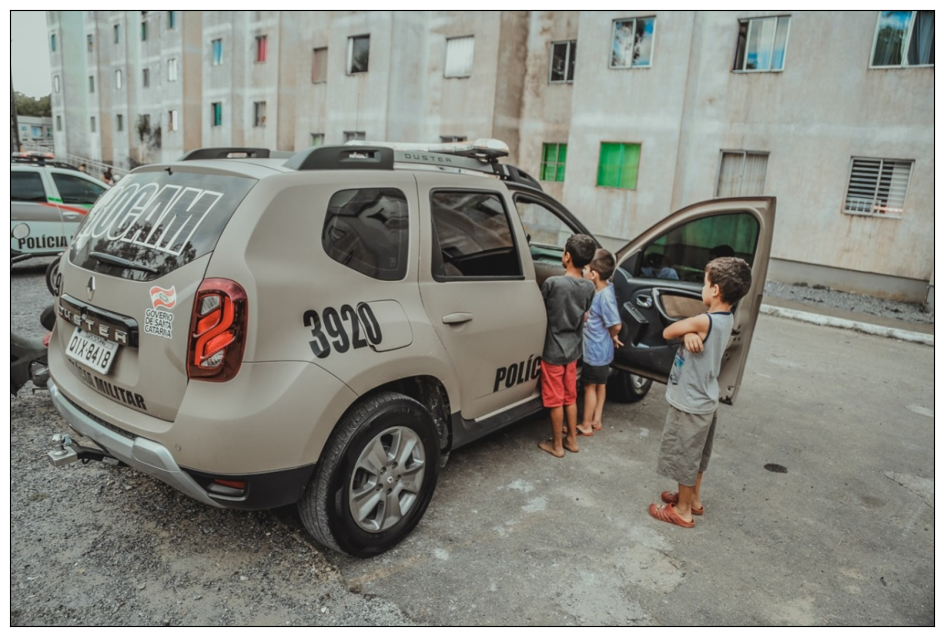

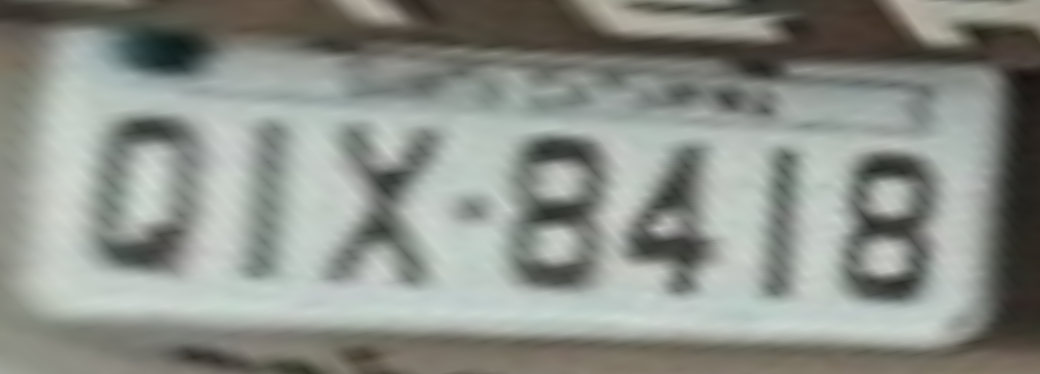

In [39]:
#Imagem lateral 2

# Carregando imagem
img1 = cv2.imread('/content/drive/MyDrive/placa 7.jpg')

# Definindo os pontos da imagem para transformação
pt1=np.float32([[85, 411], [142, 432], [124, 473], [72, 446]])
pt2=np.float32([[48, 28],[1011, 60],[977, 341],[52, 317]])

# Retirando o quadro e transformando a perspectiva
M=cv2.getPerspectiveTransform(pt1,pt2)
IT1=cv2.warpPerspective(img1,M,(1040,374))

# Mostrando imagem original e o quadro transformado de perspectiva
plt.figure(figsize=(13,8))
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])
plt.show()
cv2_imshow(IT1)

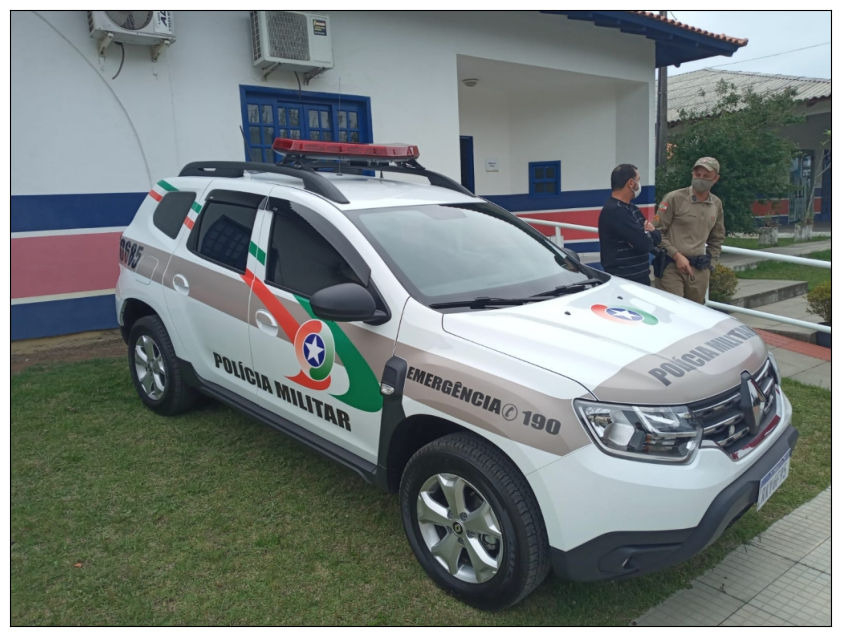

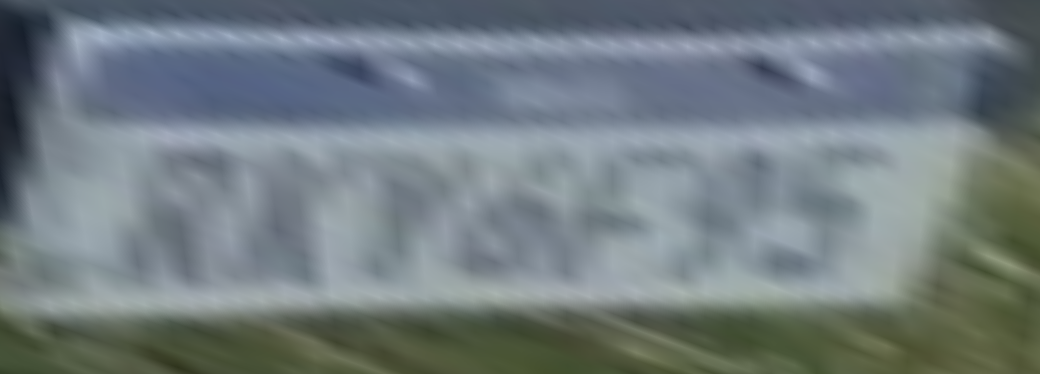

In [40]:
#Imagem lateral 3

# Carregando imagem
img1 = cv2.imread('/content/drive/MyDrive/placa 11.jpeg')

# Definindo os pontos da imagem para transformação
pt1=np.float32([[934, 587], [972, 548], [972, 582], [932, 623]])
pt2=np.float32([[48, 28],[1011, 60],[977, 341],[52, 317]])

# Retirando o quadro e transformando a perspectiva
M=cv2.getPerspectiveTransform(pt1,pt2)
IT1=cv2.warpPerspective(img1,M,(1040,374))

# Mostrando imagem original e o quadro transformado de perspectiva
plt.figure(figsize=(13,8))
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])
plt.show()
cv2_imshow(IT1)

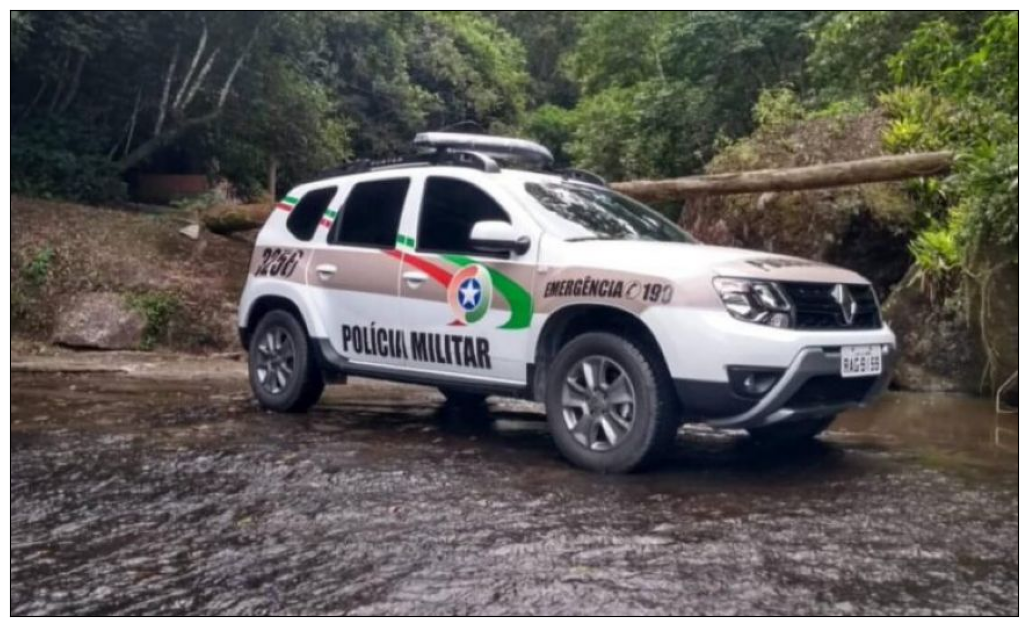

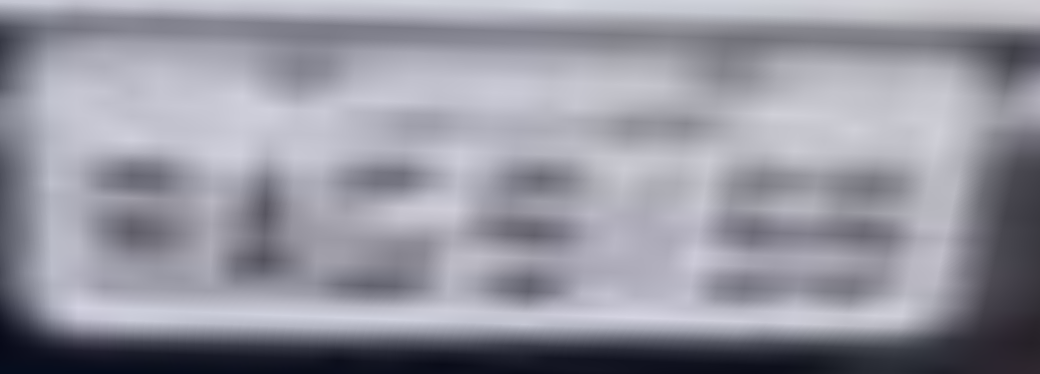

In [41]:
#Imagem lateral 4

# Carregando imagem
img1 = cv2.imread('/content/drive/MyDrive/placa 8.jpg')

# Definindo os pontos da imagem para transformação
pt1=np.float32([[717, 290], [751, 290], [752, 314], [717, 315]])
pt2=np.float32([[48, 28],[1011, 60],[977, 341],[52, 317]])

# Retirando o quadro e transformando a perspectiva
M=cv2.getPerspectiveTransform(pt1,pt2)
IT1=cv2.warpPerspective(img1,M,(1040,374))

# Mostrando imagem original e o quadro transformado de perspectiva
plt.figure(figsize=(13,8))
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])
plt.show()
cv2_imshow(IT1)

### Métricas de qualidade da imagem
As métricas podem ser utilizadas para avaliar a qualidade do processamento de imagens. Através da comparação de duas imagens mensura-se a diferença entre elas e sabe-se o quanto o processamento alterou a imagem original.
São várias as métricas que podem ser utilizadas: Erro Máximo, Erro Médio Absoluto, Erro Médio Quadrático, Raiz do Erro Médio Quadrático, Erro Médio Quadrático Normalizado, Relação Sinal-Ruído de Pico. Mostraremos nessa atividade a forma de cálculo de algumas dessa métricas.

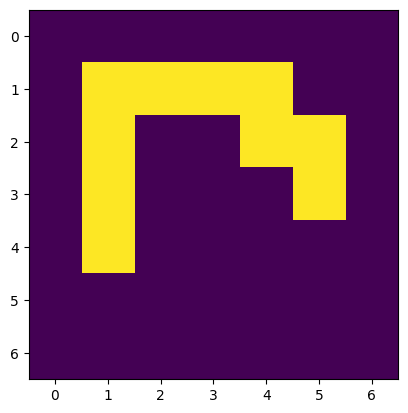

In [42]:
# Criando a imagem f
f= np.zeros((7,7),dtype='uint8')

# Alterando a cor de alguns pixels de f
f[1,1:5]=255
f[1:5,1]=255
f[2,4:6]=255
f[3,5]=255

# Mostrando a imagem criada
plt.imshow(f)

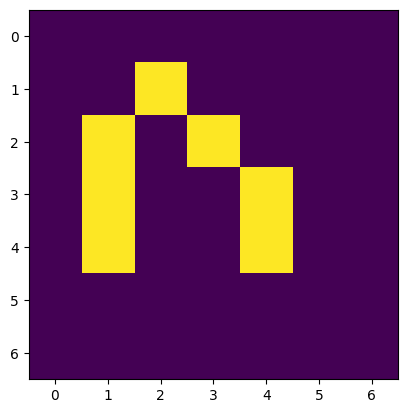

In [43]:
# Criando a imagem g
g= np.zeros((7,7),dtype='uint8')

# Alterando a cor de alguns pixels de g
g[1,2]=255
g[2:5,1]=255
g[2,3]=255
g[3:5,4]=255

# Mostrando a imagem criada
plt.imshow(g)

In [44]:
# Calculando algumas métricas de qualidade entre as duas imagens

#Erro quadrático médio
MSE= np.sum(np.square(f.astype(float)-g.astype(float)))/(f.shape[0]*f.shape[1])
print('Erro médio quadrático é:', MSE)

#Erro máximo
ME=np.max(f.astype(float)-g.astype(float))
print('Erro máximo é:', ME)

#Erro médio absoluto
MAE= np.sum(f.astype(float)-g.astype(float))/(f.shape[0]*f.shape[1])
print('Erro médio absoluto é:', MAE)

#Raiz do Erro Médio Quadrático
RMSE = np.sqrt(MSE)
print('Raiz do erro médio quadrático é:', RMSE)

#Erro Médio Quadrático Normalizado
NMSE = MSE/np.sum(np.square(f.astype(float)))
print('Erro médio quadrático normalizado:', NMSE)

# Coeficiente de correlação. As matrizes são achatadas (flatten) para o correto funcionamento desta função.
print('Coeficiente de correlação:', np.corrcoef(f.flatten(),g.flatten())[0,1])

Erro médio quadrático é: 11943.367346938776
Erro máximo é: 255.0
Erro médio absoluto é: 15.612244897959183
Raiz do erro médio quadrático é: 109.28571428571429
Erro médio quadrático normalizado: 0.018367346938775512
Coeficiente de correlação: 0.37210420376762593
